In [1]:
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tsfeature as tsf

my_path = os.path.abspath('')
my_path = my_path.split('\\')
my_path_py = "\\".join(my_path[:-1])

In [21]:
df= pd.read_csv(my_path_py+'\\DatosRaw\\DEN_2015to2020.csv', sep=',')

In [22]:
timeSeries = pd.read_csv(my_path_py+'\\DatosRaw\\SerieTemporal_2015to2020.csv', sep=',')
timeSeries = timeSeries.fillna(0.00001)
timeSeriesN = pd.read_csv(my_path_py+'\\DatosRaw\\SerieTemporalNorm_2015to2020.csv', sep=',')
timeSeriesN = timeSeriesN.fillna(0.00001)

## Funciones de Distancias

In [5]:
import math
from math import sqrt, log, floor
from sklearn.metrics import mean_squared_error
from statistics import mean
from fastdtw import fastdtw
from scipy import stats
from scipy.spatial.distance import pdist

#Euclidean
def euclidean(x, y):
    r=np.linalg.norm(x-y)
    if math.isnan(r):
        r=1
    #print(r)
    return r

#Fast Dynamic time warping
def fast_DTW(x, y):
    r, _ = fastdtw(x, y, dist=euclidean)
    if math.isnan(r):
        r=1
    #print(r)
    return r

#Spearman
def scorr(x, y):
    r = stats.spearmanr(x, y)[0]
    if math.isnan(r):
        r=0
    #print(r)
    return 1 - r

#RMSE
def rmse(x, y):
    r=sqrt(mean_squared_error(x,y))
    if math.isnan(r):
        r=1
    #print(r)
    return r

def lcs(a, b):  
    lengths = [[0 for j in range(len(b)+1)] for i in range(len(a)+1)]
    # row 0 and column 0 are initialized to 0 already
    for i, x in enumerate(a):
        for j, y in enumerate(b):
            if x == y:
                lengths[i+1][j+1] = lengths[i][j] + 1
            else:
                lengths[i+1][j+1] = max(lengths[i+1][j], lengths[i][j+1])
    x, y = len(a), len(b)
    result = lengths[x][y]
    return result

def discretise(x):
    return int(x * 10)

def multidim_lcs(a, b):
    a = a.applymap(discretise)
    b = b.applymap(discretise)
    rows, dims = a.shape
    lcss = [lcs(a[i+2], b[i+2]) for i in range(dims)]
    return 1 - sum(lcss) / (rows * dims)

#Correlation
def corr(x, y):
    r=np.dot(x-mean(x),y-mean(y))/((np.linalg.norm(x-mean(x)))*(np.linalg.norm(y-mean(y))))
    if math.isnan(r):
        r=0
    #print(r)
    return 1 - r

In [6]:
n= timeSeries.shape[0]
n

505

In [7]:
timeSeries.shape

(505, 318)

## Matriz de distancia euclidiana

In [15]:
#Euclidean
euclidean_dist = np.zeros((n,n))
for i in range(0,n):
    #print("i",i)
    for j in range(0,n):
       # print("j",j)
        euclidean_dist[i,j] = euclidean(timeSeries.iloc[i,:].values.flatten(), timeSeries.iloc[j].values.flatten())
    

## Matriz de DTW

In [16]:
#DTW
dtw_dist = np.zeros((n,n))
for i in range(0,n):
    #print("i",i)
    for j in range(0,n):
       # print("j",j)
        dtw_dist[i,j] = fast_DTW(timeSeries.iloc[i,:].values.flatten(), timeSeries.iloc[j].values.flatten())

KeyboardInterrupt: 

## Matriz de RMSE

In [17]:
#RMSE
rmse_dist = np.zeros((n,n))
for i in range(0,n):
    #print("i",i)
    for j in range(0,n):
       # print("j",j)
        rmse_dist[i,j] = rmse(timeSeries.iloc[i].values.flatten(), timeSeries.iloc[j].values.flatten())

In [24]:
rmse_distNorm = np.zeros((n,n))
for i in range(0,n):
    #print("i",i)
    for j in range(0,n):
       # print("j",j)
        rmse_distNorm[i,j] = rmse(timeSeriesN.iloc[i].values.flatten(), timeSeriesN.iloc[j].values.flatten())

## Matrices de correlación Pearson y Spearman

In [ ]:
#Corr
corr_dist = np.zeros((n,n))
for i in range(0,n):
    #print("i",i)
    for j in range(0,n):
       # print("j",j)
        corr_dist[i,j] = corr(timeSerie.iloc[i].values.flatten(), timeSeries.iloc[j].values.flatten())
#scorr
scorr_dist = np.zeros((n,n))
for i in range(0,n):
    #print("i",i)
    for j in range(0,n):
       # print("j",j)
        scorr_dist[i,j] = scorr(timeSeries.iloc[i].values.flatten(), timeSeries.iloc[j].values.flatten())

In [ ]:
#timeSeries = timeSeries.replace([np.inf, -np.inf], np.nan).fillna(0.0000001)
from numpy import inf
print('Cantidad de NAN: ', np.any(np.isnan(timeSeries)))
print('Cantidad de INF: ', np.all(np.isfinite(timeSeries)))


timeSeries[timeSeries == inf] = 0
timeSeries[timeSeries == inf] = 0
print('Cantidad de NAN: ', np.any(np.isnan(timeSeries)))
print('Cantidad de INF: ', np.all(np.isfinite(timeSeries)))

# K para RawBased

In [18]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

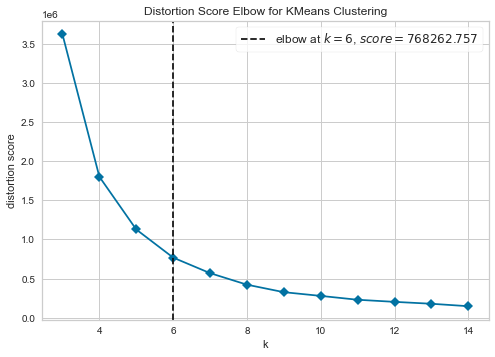

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,15),metric='distortion', timings=False)
#La metrica distortion comput la suma de cuadrado de las distancias de cada punto al centro, 
#pero se puede usar Silhouette o calinski_harabasz 
visualizer.fit(rmse_dist)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

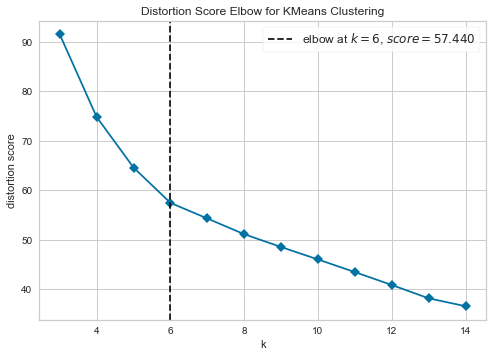

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,15),metric='distortion', timings=False)
#La metrica distortion comput la suma de cuadrado de las distancias de cada punto al centro, 
#pero se puede usar Silhouette o calinski_harabasz 
visualizer.fit(rmse_distNorm)     
visualizer.show()      

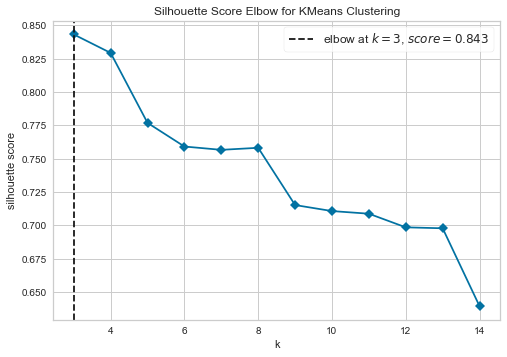

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [20]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,15),metric='silhouette', timings=False)
visualizer.fit(rmse_dist)       
visualizer.show()      


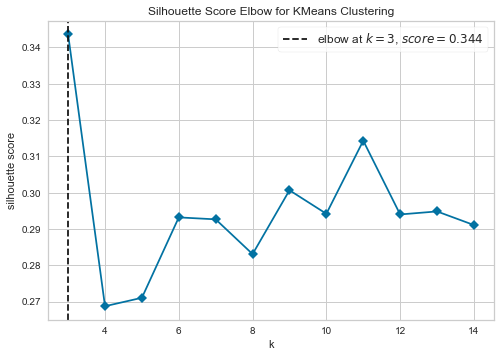

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [26]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,15),metric='silhouette', timings=False)
visualizer.fit(rmse_distNorm)        
visualizer.show()       

# K para FeatureBased 2015 al 2020

In [ ]:
features= pd.read_csv(y_path_py+'\\2_FeatureBAsed\\FB2Norm_2009al2013.csv', sep=',')
features = features.drop('Unnamed: 0', axis=1)
lista_distrito1 = features['Distrito'].values.tolist()
features = features.drop('Distrito', axis=1)

In [ ]:
n= features.shape[0]
#Euclidean
f_euclidean_dist0913 = np.zeros((n,n))
for i in range(0,n):
    #print("i",i)
    for j in range(1,n):
         f_euclidean_dist0913[i,j] = euclidean(features.iloc[i].values.flatten(), features.iloc[j].values.flatten())

#Corr
f_corr_dist0913 = np.zeros((n,n))
for i in range(0,n):
    for j in range(0,n):
            f_corr_dist0913[i,j] = corr(features.iloc[i].values.flatten(), features.iloc[j].values.flatten())

#scorr
f_scorr_dist0913 = np.zeros((n,n))
for i in range(0,n):
    for j in range(0,n):
        f_scorr_dist0913[i,j] = scorr(features.iloc[i].values.flatten(), features.iloc[j].values.flatten())
#DTW
f_dtw_dist0913 = np.zeros((n,n))
for i in range(0,n):
    for j in range(0,n):
        f_dtw_dist0913[i,j] = fast_DTW(features.iloc[i].values.flatten(), features.iloc[j].values.flatten())

#RMSE
f_rmse_dist0913 = np.zeros((n,n))
for i in range(0,n):
    #print("i",i)
    for j in range(0,n):
       # print("j",j)
        f_rmse_dist0913[i,j] = rmse(features.iloc[i].values.flatten(), features.iloc[j].values.flatten())

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
plot1 = plt.subplot2grid((8, 2), (0, 0), colspan=2, rowspan=2)
plot2 = plt.subplot2grid((8, 2), (3, 0), colspan=2, rowspan=2)
plot3 = plt.subplot2grid((8, 2), (6, 0), colspan=2, rowspan=2)

range_n_clusters = list(range(2,15))
silhouette_avg = []
for num_clusters in range_n_clusters:
 
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(f_rmse_dist0913)
    cluster_labels = kmeans.labels_
 
    # silhouette score
    silhouette_avg.append(silhouette_score(f_rmse_dist0913, cluster_labels))
plot1.plot(range_n_clusters,silhouette_avg, 'bx-')
plot1.set_title('Puntaje Silhouette vs K')

plt.show()

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,15),metric='distortion', timings=False)

visualizer.fit(f_rmse_dist0913)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,15),metric='silhouette', timings=False)

visualizer.fit(f_rmse_dist0913)        # Fit the data to the visualizer
visualizer.show()    

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(3,15),metric='silhouette', timings=False)

visualizer.fit(f_rmse_dist0913)        # Fit the data to the visualizer
visualizer.show()    

# K para FeatureBased 2009 al 2011

In [ ]:
features= pd.read_csv('FB2_2009-2010-2011.csv', sep=',')
features = features.drop('Unnamed: 0', axis=1)
lista_distrito1 = features['Distrito'].values.tolist()
features = features.drop('Distrito', axis=1)

In [ ]:
n= features.shape[0]
#Euclidean
f_euclidean_dist = np.zeros((n,n))
for i in range(0,n):
    #print("i",i)
    for j in range(1,n):
         f_euclidean_dist[i,j] = euclidean(features.iloc[i].values.flatten(), features.iloc[j].values.flatten())

#Corr
f_corr_dist = np.zeros((n,n))
for i in range(0,n):
    for j in range(0,n):
            f_corr_dist[i,j] = corr(features.iloc[i].values.flatten(), features.iloc[j].values.flatten())

#scorr
f_scorr_dist = np.zeros((n,n))
for i in range(0,n):
    for j in range(0,n):
        f_scorr_dist[i,j] = scorr(features.iloc[i].values.flatten(), features.iloc[j].values.flatten())
#DTW
f_dtw_dist = np.zeros((n,n))
for i in range(0,n):
    for j in range(0,n):
        f_dtw_dist[i,j] = fast_DTW(features.iloc[i].values.flatten(), features.iloc[j].values.flatten())

#RMSE
rmse_dist = np.zeros((n,n))
for i in range(0,n):
    #print("i",i)
    for j in range(0,n):
       # print("j",j)
        rmse_dist[i,j] = rmse(features.iloc[i].values.flatten(), features.iloc[j].values.flatten())

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(3,20),metric='distortion', timings=False)

visualizer.fit(rmse_dist)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# Gráficos de rangos de K vs Silhouette score  

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
range_n_clusters = list(range(2,10))
silhouette_avg = []
for num_clusters in range_n_clusters:
 
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(f_euclidean_dist)
    cluster_labels = kmeans.labels_
 
    # silhouette score
    silhouette_avg.append(silhouette_score(data_frame, cluster_labels))

plt.plot(range_n_clusters,s ilhouette_avg, 'bx-')
plt.xlabel('Valores de K') 
plt.ylabel('Puntaje Silhouette') 
plt.title('Puntaje Silhouette vs Número de clústeres (K)')
plt.show()

In [ ]:
range_n_clusters = list(range(2,10))
silhouette_avg = []
for num_clusters in range_n_clusters:
 
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(f_euclidean_dist)
    cluster_labels = kmeans.labels_
 
    # silhouette score
    silhouette_avg.append(silhouette_score(data_frame, cluster_labels))

plt.plot(range_n_clusters,s ilhouette_avg, 'bx-')
plt.xlabel('Valores de K') 
plt.ylabel('Puntaje Silhouette') 
plt.title('Puntaje Silhouette vs Número de clústeres (K)')
plt.show()

In [ ]:
# Dendogram for Heirarchical Clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot

pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(f_rmse_dist0913, method='ward'))